#  Прогнозирование заказов такси

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модели-с-базовыми-гиперпараметрами" data-toc-modified-id="Модели-с-базовыми-гиперпараметрами-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Модели с базовыми гиперпараметрами</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Модели-с-подбраными-гиперпараметрами" data-toc-modified-id="Модели-с-подбраными-гиперпараметрами-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Модели с подбраными гиперпараметрами</a></span><ul class="toc-item"><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Модели-с-базовыми-гиперпараметрами" data-toc-modified-id="Модели-с-базовыми-гиперпараметрами-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Модели с базовыми гиперпараметрами</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Модели-с-подбраными-гиперпараметрами" data-toc-modified-id="Модели-с-подбраными-гиперпараметрами-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Модели с подбраными гиперпараметрами</a></span><ul class="toc-item"><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Введение

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb
import time
import warnings
warnings.filterwarnings('ignore')
figsize = (16,6)

## Подготовка

In [4]:
df = pd.read_csv('F:/praktikum.yandex/Project_11/taxi.csv', index_col=[0], parse_dates=[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [7]:
df.index.is_monotonic

True

In [8]:
df.isna().sum()

num_orders    0
dtype: int64

## Анализ

In [9]:
df = df.resample('1H').sum()

In [10]:
df_copy = df.copy()

<AxesSubplot:xlabel='datetime'>

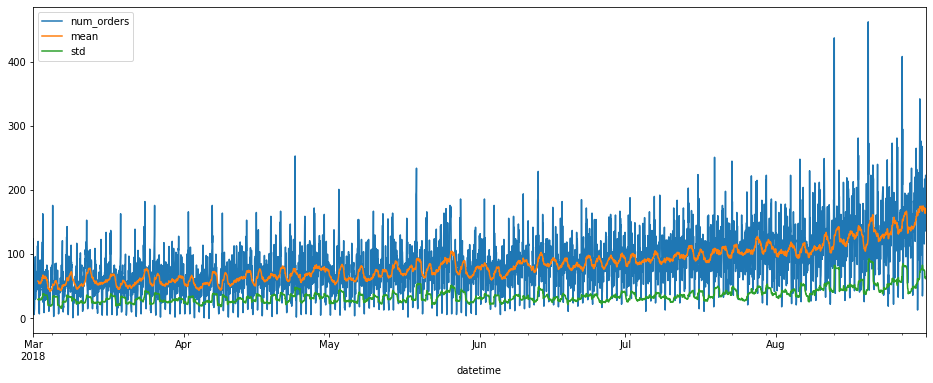

In [11]:
df_copy['mean'] = df_copy['num_orders'].rolling(25).mean()
df_copy['std'] = df_copy['num_orders'].rolling(25).std()
df_copy.plot(figsize=figsize)

In [12]:
df_copy = df_copy.dropna()
decomposed_df = seasonal_decompose(df_copy)
df_copy.head()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [13]:
decomposed_df.trend.plot(title='Тренд', figsize=figsize)
decomposed_df.seasonal['2018-08-24':'2018-08-31'].plot(title='Сезонность в течении недели', figsize=figsize)
decomposed_df.seasonal['2018-05-10 00:00:00':'2018-05-11 00:00:00'].plot(title='Сезонность в течении дня', figsize=figsize)

NameError: name 'decomposed_df' is not defined

In [14]:
def make_features(data, column, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['month'] = data.index.month
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

In [15]:
make_features(df,'num_orders', 24, 24)

train, test = train_test_split(df, shuffle=False, test_size=0.1, random_state=123456)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

In [16]:
def cv_time_series_rmse(regressor, data, target_column, n_splits, max_train_size):
    tscv = TimeSeriesSplit(n_splits = n_splits, max_train_size = max_train_size)
    RMSE = 0.0
    for train_index, test_index in tscv.split(data):
        train = data.iloc[train_index]
        test = data.iloc[test_index]
        features_train = train.drop(target_column, axis=1)
        target_train = train[target_column]
        features_test = test.drop(target_column, axis=1)
        target_test = test[target_column]
        regressor.fit(features_train, target_train)
        RMSE += mean_squared_error(target_test, regressor.predict(features_test)) ** 0.5
    return RMSE / n_splits

In [17]:
cv_train_test_split = (train.shape[0] * 4 //5)
cv_splits = 3

## Обучение

### Модели с базовыми гиперпараметрами

#### LinearRegression

In [18]:
model_lr = LinearRegression()

In [19]:
%%time

model_lr.fit(features_train, target_train)

Wall time: 4.51 ms


LinearRegression()

In [20]:
%%time

rmse_lr = cv_time_series_rmse(regressor=model_lr, 
                                 data=train, 
                                 target_column='num_orders', 
                                 n_splits=cv_splits, 
                                 max_train_size=cv_train_test_split
                             )
print('RMSE: ', rmse_lr)

RMSE:  27.530889814658206
Wall time: 22.1 ms


#### CatBoostRegressor

In [19]:
model_cbr = CatBoostRegressor(loss_function='RMSE',
                              random_state=12345,
                              verbose=False
                             )

In [20]:
%%time

cbr = model_cbr.fit(features_train,
                    target_train
                   )

CPU times: user 21.3 s, sys: 2.31 s, total: 23.6 s
Wall time: 24.5 s


In [21]:
%%time

rmse_cbr = cv_time_series_rmse(regressor=cbr,
                                   data=train,
                                   target_column='num_orders', 
                                   n_splits=cv_splits, 
                                   max_train_size=cv_train_test_split
                              )

print('RMSE: ', rmse_cbr)

RMSE:  26.336553503772265
CPU times: user 46.4 s, sys: 6.16 s, total: 52.5 s
Wall time: 54.6 s


#### LGBMRegressor

In [21]:
model_lgb = lgb.LGBMRegressor(random_state=12345)

In [22]:
%%time

lgb = model_lgb.fit(features_train,
                    target_train,
                    eval_metric = 'RMSE')

Wall time: 126 ms


In [23]:
%%time

rmse_lgb = cv_time_series_rmse(regressor=lgb,
                                   data=train,
                                   target_column='num_orders', 
                                   n_splits=cv_splits, 
                                   max_train_size=cv_train_test_split)
print('RMSE: ', rmse_lgb)

RMSE:  27.1396981285744
Wall time: 351 ms


### Модели с подбраными гиперпараметрами

#### CatBoostRegressor

In [25]:
param_cbr = {
    'learning_rate': [0.1], # 0.01-1
    'iterations': [1000], # 10-1000
    'depth': [8], # 5-20
}

clf_cbr = GridSearchCV(model_cbr, 
                        param_cbr,
                        scoring='neg_mean_squared_error')

In [40]:
%%time

clf_cbr.fit(features_train,
            target_train)

print('Best Params:', clf_cbr.best_params_)

Best Params: {'depth': 10, 'iterations': 1000, 'learning_rate': 0.1}
CPU times: user 8min 26s, sys: 23.8 s, total: 8min 49s
Wall time: 8min 54s


In [41]:
%%time

rmse_clf_cbr = cv_time_series_rmse(regressor=clf_cbr.best_estimator_,
                                   data=train,
                                   target_column='num_orders', 
                                   n_splits=cv_splits, 
                                   max_train_size=cv_train_test_split)

print('RMSE: ', rmse_clf_cbr)

RMSE:  27.749476036739335
CPU times: user 4min 45s, sys: 13.3 s, total: 4min 58s
Wall time: 5min 1s


#### LGBMRegressor

In [64]:
param_lgb = {
    'learning_rate': [0.05,0.06,0.07], #0.01-1
    'n_estimators': [95,100,105], # 10-1000
    'max_depth': [11,12,13], # 1-20
}

clf_lgb = GridSearchCV(model_lgb, 
                        param_lgb,
                        scoring = 'neg_mean_squared_error')

In [65]:
%%time

clf_lgb.fit(features_train,
             target_train,
             eval_metric = 'RMSE'
           )

print('Best Params:', clf_lgb.best_params_)

Best Params: {'learning_rate': 0.06, 'max_depth': 12, 'n_estimators': 100}
Wall time: 15.6 s


In [35]:
%%time

rmse_clf_lgb = cv_time_series_rmse(regressor=clf_lgb.best_estimator_,
                                   data=train,
                                   target_column='num_orders', 
                                   n_splits=cv_splits, 
                                   max_train_size=cv_train_test_split)

print('RMSE: ', rmse_clf_lgb)

RMSE:  27.3391107783673
CPU times: user 30.7 s, sys: 156 ms, total: 30.9 s
Wall time: 31.1 s


## Тестирование

### Модели с базовыми гиперпараметрами

In [43]:
def plot():
    plt.figure(figsize=figsize)
    plt.plot(target_test.index, 
             target_test, 
             'b-', 
             target_test.index, 
             target_predict,
             'r-'
            )

#### LinearRegression

RMSE:  46.911291861611076
CPU times: user 78.8 ms, sys: 95.2 ms, total: 174 ms
Wall time: 46.7 ms


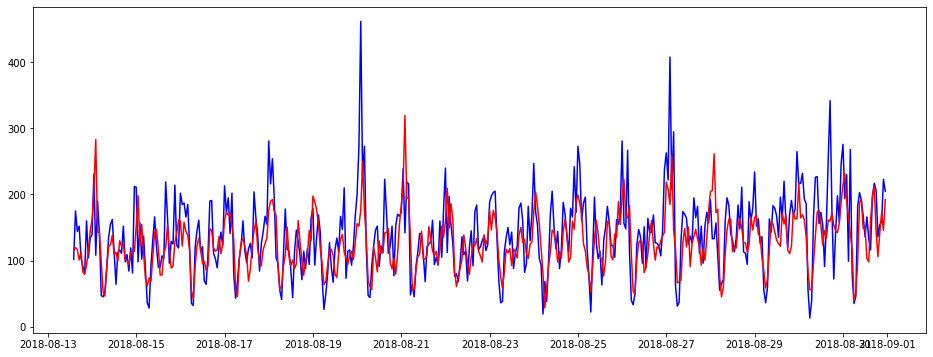

In [44]:
%%time

target_predict = model_lr.predict(features_test)
rmse_lr_test = mean_squared_error(target_test, target_predict) ** 0.5

plot()

print('RMSE: ', rmse_lr_test)

#### CatBoostRegressor

RMSE:  57.43819753090379
CPU times: user 23 ms, sys: 234 µs, total: 23.3 ms
Wall time: 18.5 ms


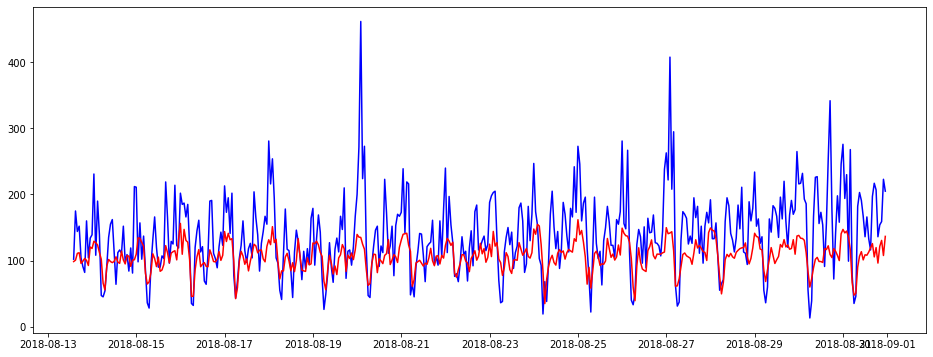

In [47]:
%%time

target_predict = cbr.predict(features_test)
rmse_cbr_test = mean_squared_error(target_test, target_predict) ** 0.5

plot()

print('RMSE: ', rmse_cbr_test)

#### LGBMRegressor

RMSE:  60.921880155874284
CPU times: user 55.3 ms, sys: 7.96 ms, total: 63.3 ms
Wall time: 25.7 ms


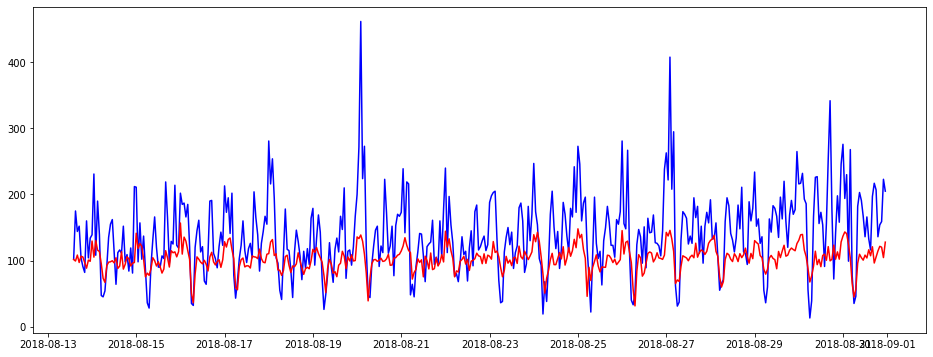

In [48]:
%%time

target_predict = lgb.predict(features_test)
rmse_lgb_test = mean_squared_error(target_test, target_predict) ** 0.5

plot()

print('RMSE: ', rmse_lgb_test)

### Модели с подбраными гиперпараметрами

#### CatBoostRegressor

RMSE:  67.83908845085132
CPU times: user 23.7 ms, sys: 3.77 ms, total: 27.5 ms
Wall time: 19.1 ms


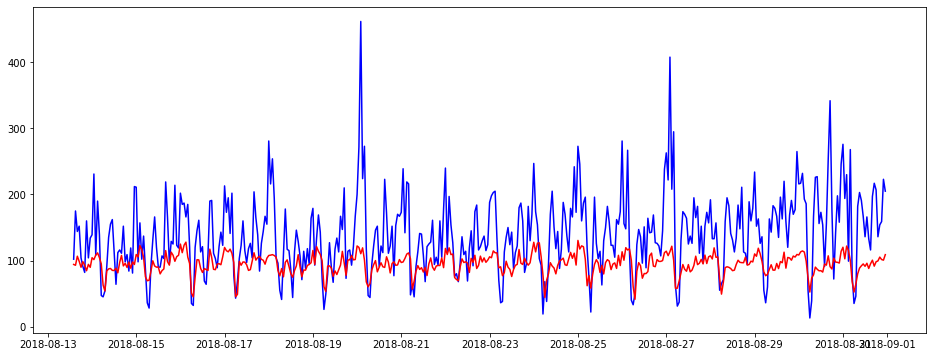

In [49]:
%%time

target_predict = clf_cbr.best_estimator_.predict(features_test)
rmse_clf_cbr_test = mean_squared_error(target_test, target_predict) ** 0.5

plot()

print('RMSE: ', rmse_clf_cbr_test)

#### LGBMRegressor

RMSE:  61.244637948293466
CPU times: user 123 ms, sys: 4.14 ms, total: 128 ms
Wall time: 65.6 ms


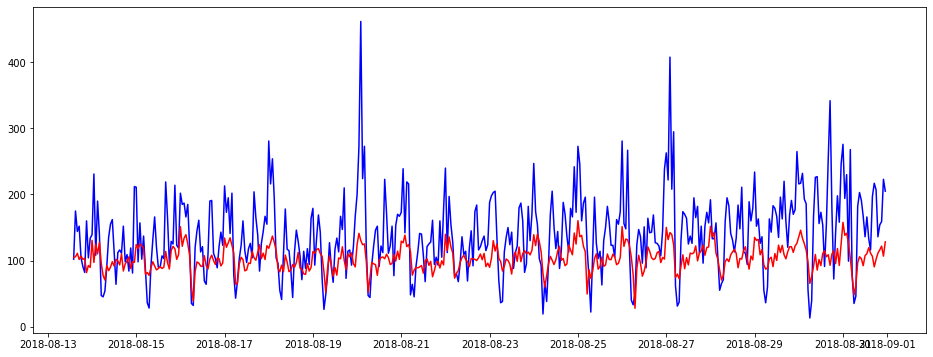

In [50]:
%%time

target_predict = clf_lgb.best_estimator_.predict(features_test)
rmse_clf_lgb_test = mean_squared_error(target_test, target_predict) ** 0.5

plot()

print('RMSE: ', rmse_clf_lgb_test)

In [42]:
index = ['LinearRegression', 'CatBoostRegressor', 'LGBMRegressor', 'CatBoostRegressor optimized', 'LGBMRegressor optimized']
data = {'RMSE при обучение':[rmse_lr, rmse_cbr, rmse_lgb, rmse_clf_cbr, rmse_clf_lgb],
        'RMSE при предсказании':[rmse_lr_test, rmse_cbr_test, rmse_lgb_test, rmse_clf_cbr_test, rmse_clf_lgb_test],}
scores_data = pd.DataFrame(data = data, index = index)
scores_data

,RMSE при обучение,RMSE при предсказании
LinearRegression,27.530890,46.911292
CatBoostRegressor,26.336554,57.438198
LGBMRegressor,27.139698,60.921880
CatBoostRegressor optimized,27.749476,43.334993
LGBMRegressor optimized,27.339111,61.244638


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48